In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from tensorflow.keras import layers, models, callbacks
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
from keras.optimizers import Adam
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Extract data

In [3]:
data = pd.read_json('/content/drive/MyDrive/satelite/planesnet.json')

In [4]:
data.head()

,data,labels,locations,scene_ids
0,"[206, 195, 187, 183, 177, 175, 174, 193, 198, ...",1,"[-118.40497658522878, 33.940618514147936]",20170620_175442_0e30
1,"[215, 209, 200, 196, 192, 197, 205, 168, 155, ...",1,"[-122.392469714, 37.6176425378]",20161212_180859_0e30
2,"[204, 214, 220, 219, 213, 205, 198, 193, 199, ...",1,"[-122.397578597, 37.6209247852]",20170524_181349_0e2f
3,"[179, 174, 179, 178, 173, 170, 168, 168, 168, ...",1,"[-122.214849831, 37.7203378331]",20161110_180707_0e1f
4,"[222, 222, 218, 214, 208, 205, 207, 206, 206, ...",1,"[-117.862173435, 33.6796854072]",20160813_184932_0c64


In [5]:
data.tail()

,data,labels,locations,scene_ids
31995,"[217, 197, 206, 221, 219, 200, 202, 222, 231, ...",0,"[-117.51619965614212, 34.08254781774721]",20170726_174731_0f34
31996,"[184, 198, 218, 222, 220, 216, 216, 215, 210, ...",0,"[-117.2352626288379, 32.79485122236176]",20160726_173906_0e0e
31997,"[121, 121, 119, 117, 119, 112, 118, 117, 126, ...",0,"[-121.4835244137727, 38.53386512064711]",20151030_162249_0c03
31998,"[172, 190, 202, 202, 196, 193, 188, 191, 199, ...",0,"[-118.32580026781089, 33.83093529544055]",20160715_174337_0e0e
31999,"[161, 172, 189, 190, 178, 151, 156, 171, 174, ...",0,"[-122.3275363089765, 37.57495862200392]",20170712_181006_0f12


#EDA

In [6]:
data.shape

(32000, 4)

In [7]:
data['data']

0        [206, 195, 187, 183, 177, 175, 174, 193, 198, ...
1        [215, 209, 200, 196, 192, 197, 205, 168, 155, ...
2        [204, 214, 220, 219, 213, 205, 198, 193, 199, ...
3        [179, 174, 179, 178, 173, 170, 168, 168, 168, ...
4        [222, 222, 218, 214, 208, 205, 207, 206, 206, ...
                               ...                        
31995    [217, 197, 206, 221, 219, 200, 202, 222, 231, ...
31996    [184, 198, 218, 222, 220, 216, 216, 215, 210, ...
31997    [121, 121, 119, 117, 119, 112, 118, 117, 126, ...
31998    [172, 190, 202, 202, 196, 193, 188, 191, 199, ...
31999    [161, 172, 189, 190, 178, 151, 156, 171, 174, ...
Name: data, Length: 32000, dtype: object

In [8]:
print(len(data['data'][1]))


1200


In [9]:
X = []
for d in data['data']:
    d = np.array(d)
    d=d.reshape(3,400).T.reshape(20,20,3)
    X.append(d)

X = np.array(X)
y = np.array(data['labels'])
print(X.shape)
print(y.shape)

(32000, 20, 20, 3)
(32000,)


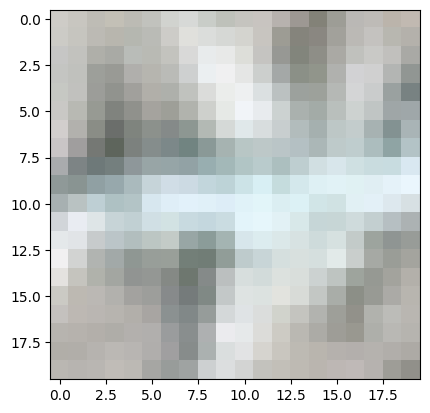

In [10]:
plt.imshow(X[100])

In [11]:
y[100]

1

#Preprocessing

In [12]:
X_scaled=X/255

In [13]:
X_scaled[0]

array([[[0.80784314, 0.79607843, 0.7372549 ],
        [0.76470588, 0.75294118, 0.68627451],
        [0.73333333, 0.71764706, 0.64313725],
        ...,
        [0.83921569, 0.81568627, 0.69803922],
        [0.99607843, 0.96470588, 0.86666667],
        [1.        , 0.96862745, 0.89803922]],

       [[0.81176471, 0.8       , 0.74901961],
        [0.78431373, 0.76470588, 0.70588235],
        [0.75294118, 0.73333333, 0.6627451 ],
        ...,
        [0.85490196, 0.83137255, 0.70980392],
        [1.        , 0.97254902, 0.88627451],
        [1.        , 0.97254902, 0.90980392]],

       [[0.85098039, 0.83921569, 0.78431373],
        [0.78431373, 0.76470588, 0.69411765],
        [0.76078431, 0.7372549 , 0.66666667],
        ...,
        [0.8627451 , 0.82745098, 0.70588235],
        [1.        , 0.94901961, 0.84313725],
        [1.        , 0.96078431, 0.88235294]],

       ...,

       [[0.71764706, 0.70980392, 0.65490196],
        [0.79607843, 0.78431373, 0.73333333],
        [0.8       , 0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25,random_state=42)

(array([17992.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6008.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

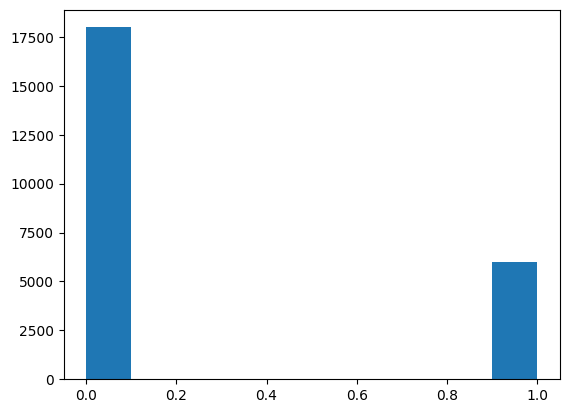

In [15]:
plt.hist(y_train)

(array([6008.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1992.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

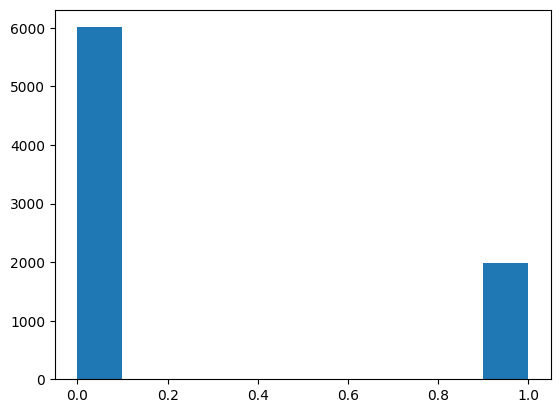

In [16]:
plt.hist(y_test)


#Model

In [17]:
model=Sequential()

In [18]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 64)                0

In [21]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [22]:
history = model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/15
1200/1200 [==============================] - 10s 4ms/step - loss: 0.2684 - accuracy: 0.8843 - val_loss: 0.1775 - val_accuracy: 0.9319
Epoch 2/15
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1507 - accuracy: 0.9398 - val_loss: 0.1326 - val_accuracy: 0.9485
Epoch 3/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.1290 - accuracy: 0.9508 - val_loss: 0.1133 - val_accuracy: 0.9602
Epoch 4/15
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1135 - accuracy: 0.9571 - val_loss: 0.1528 - val_accuracy: 0.9383
Epoch 5/15
1200/1200 [==============================] - 6s 5ms/step - loss: 0.1037 - accuracy: 0.9605 - val_loss: 0.1294 - val_accuracy: 0.9513
Epoch 6/15
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0982 - accuracy: 0.9638 - val_loss: 0.1255 - val_accuracy: 0.9513
Epoch 7/15
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0857 - accuracy: 0.9680 - val_loss: 0.1073 - val_accuracy

In [24]:
model.save('tf_model')

In [ ]:
model = tf.keras.models.load_model('/content/tf_model')

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

250/250 [==============================] - 2s 4ms/step - loss: 0.0883 - accuracy: 0.9714
Test accuracy: 0.9713749885559082


In [26]:
prediction_model=model.predict(X_test)

250/250 [==============================] - 1s 3ms/step


In [27]:
prediction_model

array([[2.5537670e-07],
       [7.8968350e-07],
       [4.8099570e-05],
       ...,
       [9.5380545e-02],
       [7.6005075e-05],
       [4.8261161e-05]], dtype=float32)

(array([6008.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1992.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

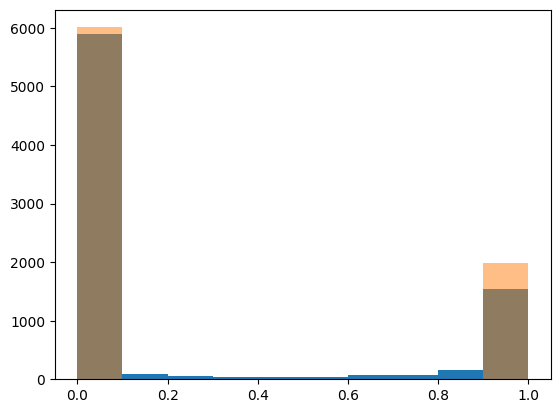

In [30]:
plt.hist(prediction_model)
plt.hist(y_test,alpha=0.5)

#Testing on real image

In [31]:
large_img = cv2.imread('/content/drive/MyDrive/satelite/scenes/scenes/scene_1.png', cv2.IMREAD_COLOR)
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)


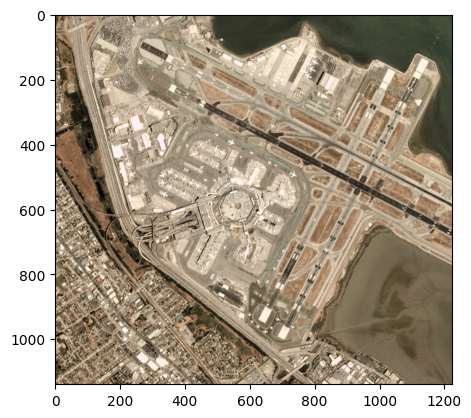

In [32]:
plt.imshow(large_img)

In [33]:
large_img.shape

(1139, 1225, 3)

In [34]:
large_img.shape[1]

1225

In [38]:
patches = []
patch_coordinates = []

size_x = 20
size_y = 20
overlap = 3  # Number of pixels for overlap


for i in range(0, large_img.shape[0] - size_x + 1, overlap):
    for j in range(0, large_img.shape[1] - size_y + 1, overlap):
        patch = large_img[i:i+size_x, j:j+size_y, :]
        patches.append(patch)
        patch_coordinates.append((j, i, j + size_y, i + size_x))


patches_array = np.array(patches)

In [39]:
patches_array.shape

(150348, 20, 20, 3)

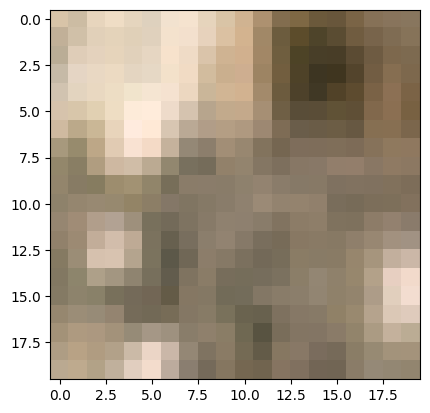

In [40]:
plt.imshow(patches_array[9000])

In [41]:
patches_array_scaled=patches_array/255

In [42]:
patches_array_scaled.max().max()

1.0

In [43]:
predictions = model.predict(patches_array_scaled)

4699/4699 [==============================] - 9s 2ms/step


In [44]:
indexs=[]
for index, pred in enumerate(predictions):
    if pred > 0.5:
        indexs.append(index)

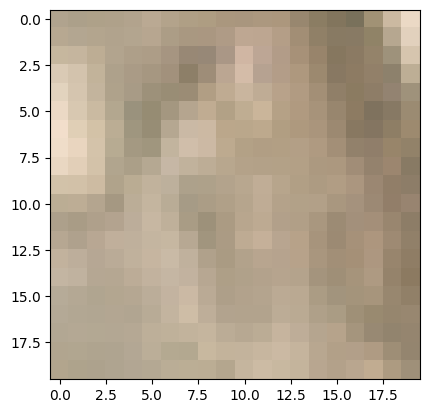

In [45]:
plt.imshow(patches_array_scaled[100])

In [46]:
detected_patch_coordinates=[]
for ind in indexs:
  detected_patch_coordinates.append(patch_coordinates[ind])

In [47]:
image_with_rectangles = large_img.copy()


for (x1, y1, x2, y2) in detected_patch_coordinates:  # Assuming your coordinates are (x1, y1, x2, y2)
    cv2.rectangle(image_with_rectangles, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw a green rectangle with thickness 2


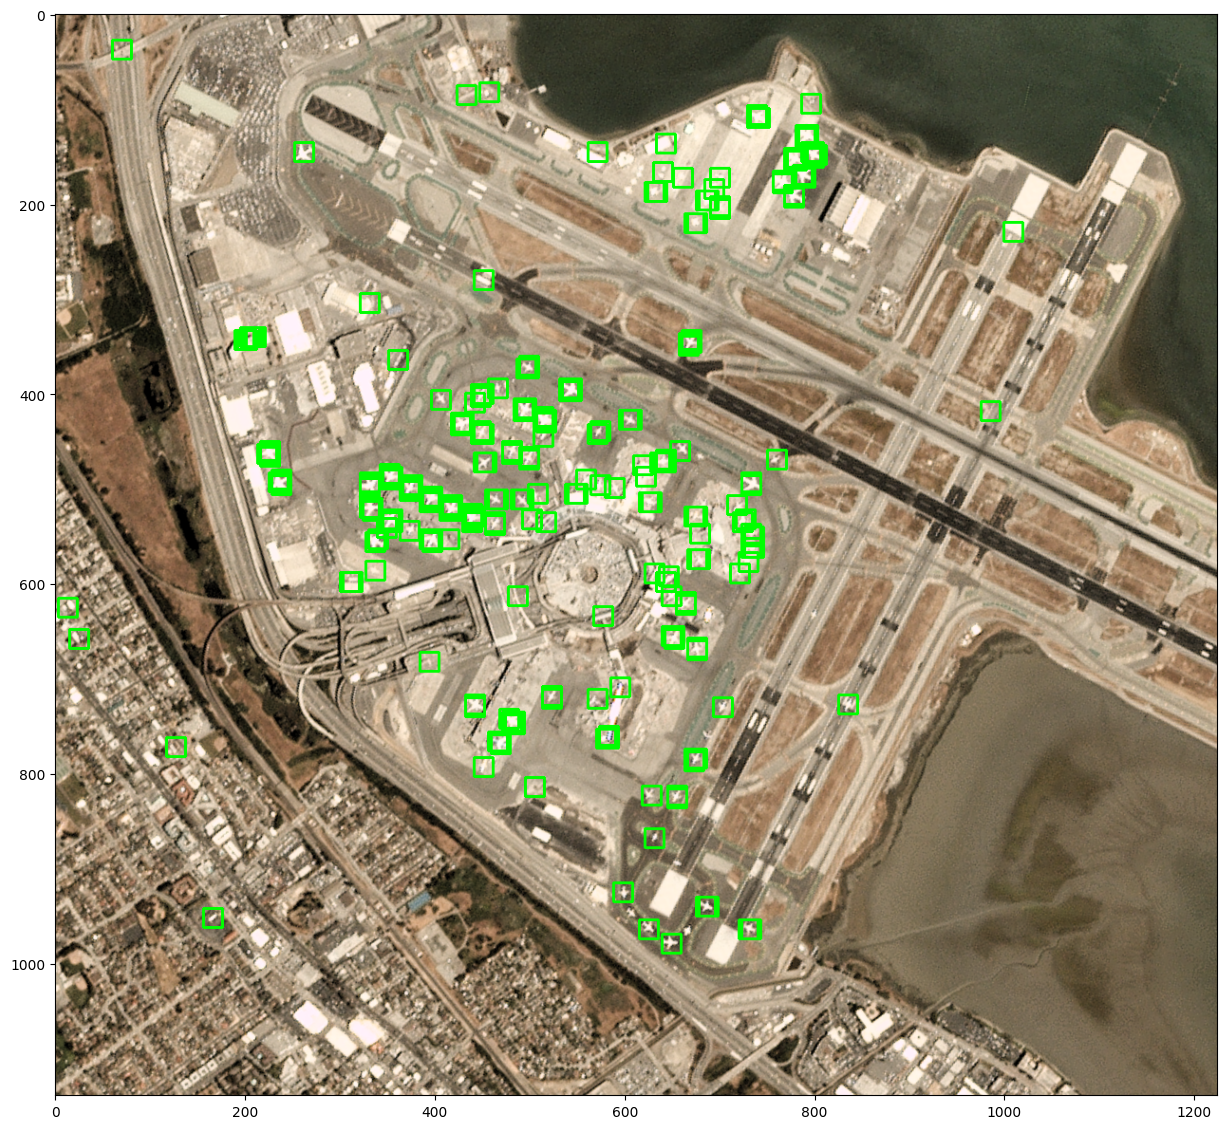

In [48]:
plt.figure(figsize=(15, 15))

# Show or save the image with rectangles
plt.imshow(image_with_rectangles)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()